# Volume 4: Spectral 1
    <Name>
    <Class>
    <Date>

In [41]:
# Import needed libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
import scipy.integrate as integrate

%matplotlib inline

# Setup

In [42]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D[::-1,::-1], x[::-1]

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

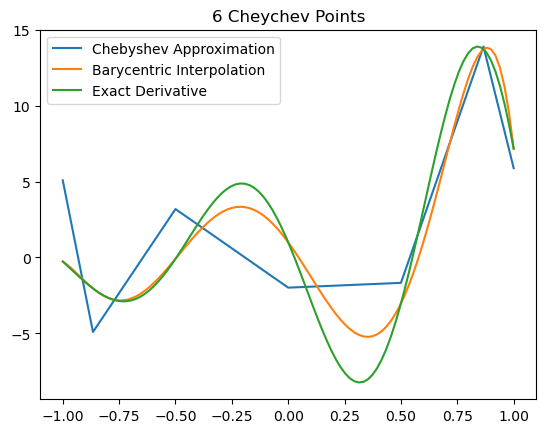

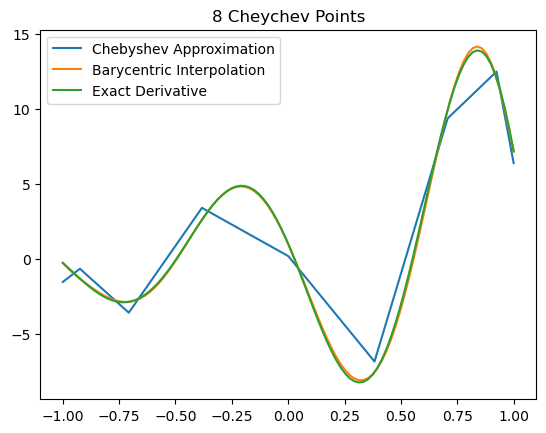

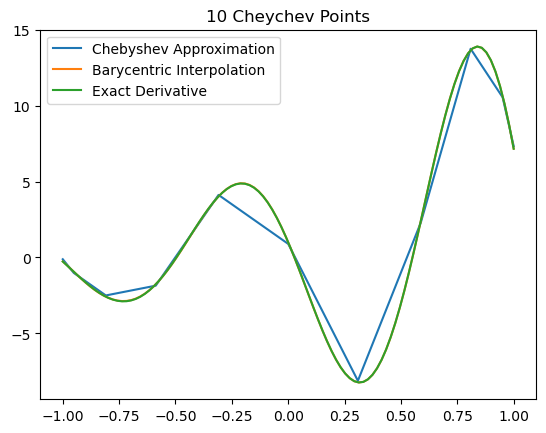

In [43]:
# Define constants and functions
N = [6,8,10]
u = lambda x: np.exp(x) * np.cos(6*x)
u_prime = lambda x: np.exp(x) * np.cos(6*x) -6*np.exp(x)*np.sin(6*x)
x_linspace = np.linspace(-1,1,100)
y_linspace = u_prime(x_linspace)

# Run through all possible values of N
for n in N:
    D, x = cheb(n)
    
    # Get Chebyshev approximation and barycentric approximation
    U = u(x)
    U_prime_approx = D @ U
    interp_vals = barycentric_interpolate(x, u_prime(x), x_linspace)
    
    # Plot data
    plt.plot(x, U_prime_approx, label = 'Chebyshev Approximation')
    plt.plot(x_linspace, interp_vals, label = 'Barycentric Interpolation')
    plt.plot(x_linspace, u_prime(x_linspace), label = 'Exact Derivative')
    plt.title(f"{n} Cheychev Points")
    plt.legend()
    plt.show()



# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

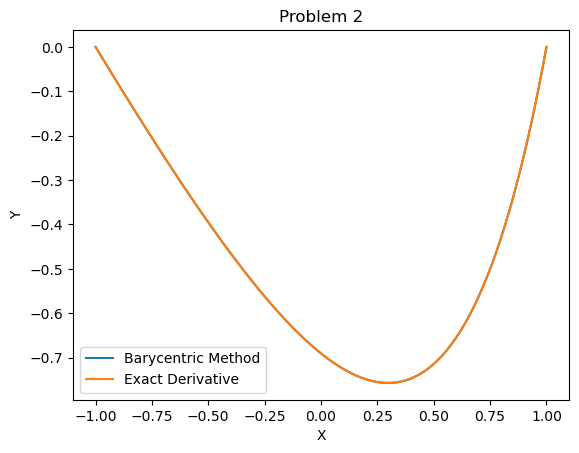

In [44]:
# The following code will force U[0] = U[N] = 0
D, x = cheb(8) # for some N
D2 = np.dot(D,D)
D2[0,:], D2[-1,:] = 0,0
D2[0,0], D2[-1,-1] = 1,1

# Solve for F
f = lambda x: np.exp(2*x)
F = f(x)
F[0], F[-1] = 0,0

# Solve for U
U = la.inv(D2) @ F

# Get barycentric interpolation
x_linspace = np.linspace(-1,1,100)
interp_vals = barycentric_interpolate(x,U, x_linspace)

# Get exact derivative
exact_derivative = lambda x: (-np.cosh(2) - np.sinh(2) * x + np.exp(2*x))/4
exact_vals = exact_derivative(x_linspace)

# Plot data
plt.plot(x_linspace, interp_vals, label = 'Barycentric Method')
plt.plot(x_linspace, exact_vals, label = 'Exact Derivative')
plt.title("Problem 2")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

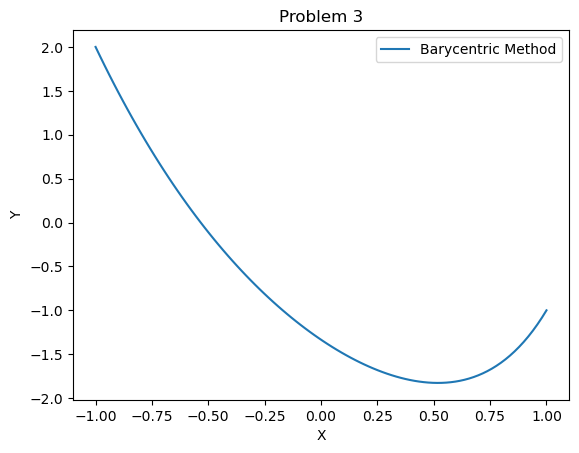

In [45]:
# Get Chebyshev points and derivative matrices
D, x = cheb(8)
D2 = np.dot(D,D)

# Define boundary value and left side matrix
D_final = D + D2
D_final[0,:], D_final[-1,:] = 0,0
D_final[0,0], D_final[-1,-1] = 1, 1

# Solve for F
f = lambda x: np.exp(3*x)
F = f(x)
F[0], F[-1] = 2,-1

# Solve for U
U = la.inv(D_final) @ F

# Get barycentric interpolation
x_linspace = np.linspace(-1,1,100)
interp_vals = barycentric_interpolate(x,U, x_linspace)

# Plot data
plt.plot(x_linspace, interp_vals, label = 'Barycentric Method')
plt.title("Problem 3")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()




# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

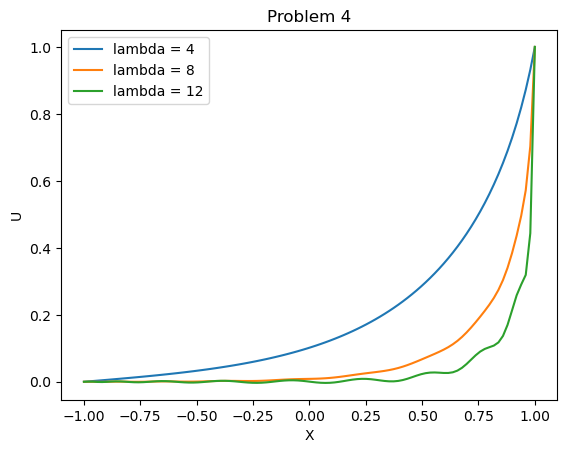

In [46]:
# Get Chebyshev points and derivative matrix
D, x = cheb(20)
D2 = np.dot(D,D)

# Define function that we are going to do root finder on
def F(U):
    out =  4 * D2 @ U - lambd * np.sinh(lambd * U)
    out[-1] = U[-1] - 1
    out[0] = U[0]
    return out

# Do barycentric interpolation for a variety of different lambda values
for lambd in [4,8,12]:
    guess = np.ones_like(x)
    solution = root(F, guess).x
    x_linspace = np.linspace(-1,1,100)
    interp_vals = barycentric_interpolate(x,solution, x_linspace)
    
    # Plot data
    plt.plot(x_linspace, interp_vals, label = f'lambda = {lambd}')
    
# Make the plot neat
plt.title("Problem 4")
plt.xlabel('X')
plt.ylabel('U') 
plt.legend()
plt.show()
    



    
    


# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

Surface Area 156.8182462831231


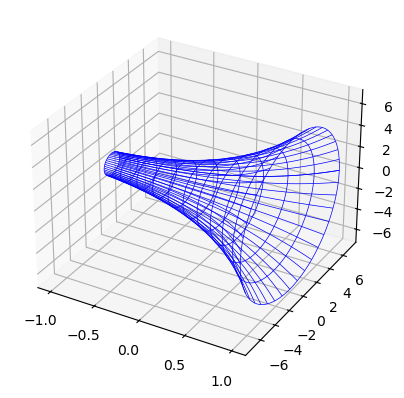

In [47]:
# Get Chebyshev points and derivative matrix
D, x = cheb(50)
D2 = np.dot(D,D)

# Define function that we are going to do root finder on
def F(Y):
    out = Y * (D2 @ Y) - (D @ Y) * (D @ Y) - np.ones_like(Y)
    out[0] = Y[0] - 1
    out[-1] = Y[-1] - 7
    return out
    
# Get the barycentric interpolation
guess = np.ones_like(x) * 2
solution = root(F, guess).x
x_linspace = np.linspace(-1,1,100)
barycentric = barycentric_interpolate(x,solution, x_linspace)

# Calculate the surface area
surface_area = integrate.quad(lambda y: 2*np.pi*barycentric_interpolate(x, solution, y) 
                              * np.sqrt(1 + (barycentric_interpolate(x, D @ solution, y)**2)), -1, 1)[0]

print("Surface Area", surface_area)

# Plot surface
lin = np.linspace(-1,1,100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, color='b', rstride=10, cstride=10, lw=0.5)